In [3]:
import pandas as pd
import numpy as np
from math import sqrt

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew

from sklearn.linear_model    import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import RidgeCV
from sklearn.pipeline        import make_pipeline
from sklearn.preprocessing   import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.preprocessing   import StandardScaler
from sklearn.metrics         import mean_squared_error
from sklearn.linear_model    import Lasso
from sklearn                 import linear_model

In [10]:
women100 = pd.read_csv("100_Women_Results.csv")
y = women100['Sr_PR']
X = women100
del X['Sr_PR']
del X['ID']
del X['Name']
del X['School_ID']
del X['School']
del X['Division']
del X['Grad_Yr']
del X['Unnamed: 0']

In [5]:
y.head()

0    11.81
1    12.02
2    12.17
3    12.58
4    11.28
Name: Sr_PR, dtype: float64

In [11]:
X.head()

,Fr_PR,So_PR,Jr_PR
0,11.78,11.81,11.78
1,11.34,11.42,11.30
2,11.74,11.72,11.58
3,12.34,12.76,12.43
4,11.29,11.22,11.27


In [13]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [14]:
# Create an empty model
lr = LinearRegression()

# Fit the model to the full dataset
lr.fit(X_train, y_train)

# Print out the R^2 for the model against the full dataset
lr.score(X_train,y_train)

0.7931694555421639

In [15]:
y_pred = lr.predict(X_test)

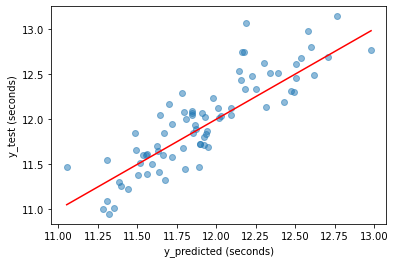

In [16]:
plt.scatter(y_pred,y_test,alpha=0.5);
plt.ylabel('y_test (seconds)');
plt.xlabel('y_predicted (seconds)');

plt.plot([max(y_pred),min(y_pred)],[max(y_pred),min(y_pred)],color='r')
#plt.plot([240,470],[240,470],color='r')

#plt.savefig('test_vs_pred.png');

In [17]:
print('Using all data (9th, 10th & 11th grades) to predict 12th grade PR')
print('Train R^2: ',lr.score(X_train, y_train))
print('Train RMSE:', 
      sqrt(mean_squared_error(y_train, lr.predict(X_train))))
print('Test R^2: ', lr.score(X_test, y_test))
print('Test RMSE:', 
        sqrt(mean_squared_error(y_test, lr.predict(X_test))))

data = y_test-lr.predict(X_test)
print('Skew:',skew(data))
print("mean : ", np.mean(data))
print("var  : ", np.var(data))
print("skew : ",skew(data))
print("kurt : ",kurtosis(data))

Using all data (9th, 10th & 11th grades) to predict 12th grade PR
Train R^2:  0.7931694555421639
Train RMSE: 0.23370211670524965
Test R^2:  0.7407713018037778
Test RMSE: 0.25679771093272735
Skew: 0.5519249155438655
mean :  0.05243584505118523
var  :  0.0631955464940567
skew :  0.5519249155438655
kurt :  0.2724065304751142


In [19]:
Men100 = pd.read_csv("100_Men_Results.csv")
y = Men100['Sr_PR']
X = Men100
del X['Sr_PR']
del X['ID']
del X['Name']
del X['School_ID']
del X['School']
del X['Division']
del X['Grad_Yr']
del X['Unnamed: 0']

Using all data (9th, 10th & 11th grades) to predict 12th grade PR
Train R^2:  0.6843146056575115
Train RMSE: 0.234916244546457
Test R^2:  0.7862406032349978
Test RMSE: 0.19826642314045104
Skew: 0.33766524380452967
mean :  -0.0352396163122472
var  :  0.038067743987073986
skew :  0.33766524380452967
kurt :  0.3467381736258064


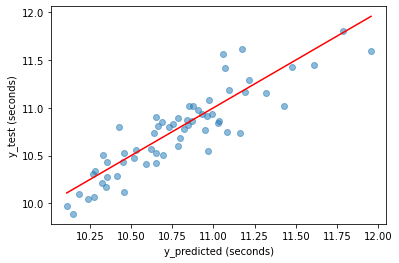

In [20]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

y_pred = lr.predict(X_test)

plt.scatter(y_pred,y_test,alpha=0.5);
plt.ylabel('y_test (seconds)');
plt.xlabel('y_predicted (seconds)');

plt.plot([max(y_pred),min(y_pred)],[max(y_pred),min(y_pred)],color='r')
#plt.plot([240,470],[240,470],color='r')

#plt.savefig('test_vs_pred.png');

print('Using all data (9th, 10th & 11th grades) to predict 12th grade PR')
print('Train R^2: ',lr.score(X_train, y_train))
print('Train RMSE:', 
      sqrt(mean_squared_error(y_train, lr.predict(X_train))))
print('Test R^2: ', lr.score(X_test, y_test))
print('Test RMSE:', 
        sqrt(mean_squared_error(y_test, lr.predict(X_test))))

data = y_test-lr.predict(X_test)
print('Skew:',skew(data))
print("mean : ", np.mean(data))
print("var  : ", np.var(data))
print("skew : ",skew(data))
print("kurt : ",kurtosis(data))

In [21]:
Women5000 = pd.read_csv("5000_Women_Results.csv")
y = Women5000['Sr_PR']
X = Women5000
del X['Sr_PR']
del X['ID']
del X['Name']
del X['School_ID']
del X['School']
del X['Division']
del X['Grad_Yr']
del X['Unnamed: 0']

Using all data (9th, 10th & 11th grades) to predict 12th grade PR
Train R^2:  -0.12570281702673958
Train RMSE: 189.67738935347649
Test R^2:  -1.6219430423672883
Test RMSE: 97.76994542112475
Skew: -4.695907810418419
mean :  1.2360674107870093
var  :  9557.4343650057
skew :  -4.695907810418419
kurt :  24.503974083945604


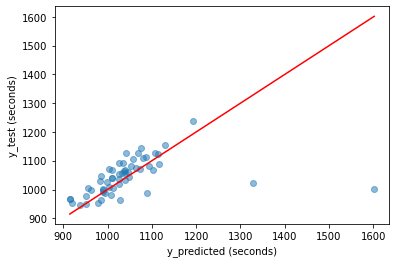

In [22]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

y_pred = lr.predict(X_test)

plt.scatter(y_pred,y_test,alpha=0.5);
plt.ylabel('y_test (seconds)');
plt.xlabel('y_predicted (seconds)');

plt.plot([max(y_pred),min(y_pred)],[max(y_pred),min(y_pred)],color='r')
#plt.plot([240,470],[240,470],color='r')

#plt.savefig('test_vs_pred.png');

print('Using all data (9th, 10th & 11th grades) to predict 12th grade PR')
print('Train R^2: ',lr.score(X_train, y_train))
print('Train RMSE:', 
      sqrt(mean_squared_error(y_train, lr.predict(X_train))))
print('Test R^2: ', lr.score(X_test, y_test))
print('Test RMSE:', 
        sqrt(mean_squared_error(y_test, lr.predict(X_test))))

data = y_test-lr.predict(X_test)
print('Skew:',skew(data))
print("mean : ", np.mean(data))
print("var  : ", np.var(data))
print("skew : ",skew(data))
print("kurt : ",kurtosis(data))